In [63]:
from sklearn.datasets import make_classification
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch import nn

In [64]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42,
)

X = torch.from_numpy(X).type(dtype=torch.float32)
y = torch.from_numpy(y).type(dtype=torch.float32)

In [65]:
print(X)

tensor([[-0.9991, -0.6639],
        [ 1.2467,  1.1536],
        [ 0.9628,  0.8594],
        ...,
        [-0.1013, -1.5902],
        [ 0.6438, -0.7805],
        [ 0.6985, -1.2794]])


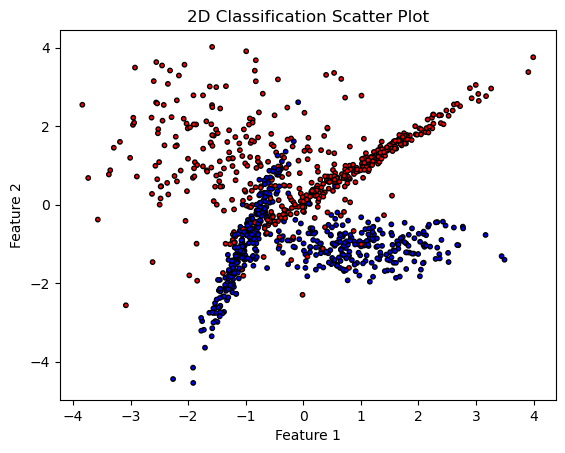

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", s=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Classification Scatter Plot")
plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


class Classification_Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=2, out_features=12),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=12, out_features=24),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(in_features=24, out_features=1),
            nn.Sigmoid(),
        )

    def forward(self, X):
        return self.model(X)

In [68]:
torch.manual_seed(42)
model_10 = Classification_Model()

In [69]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(params=model_10.parameters(),lr=0.01)

In [70]:
epochs = 1000
test_loss_values = []
train_loss_values = []
for epoch in range(epochs):
    model_10.train()
    y_preds = model_10(X_train).squeeze()
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_10.eval()
    with torch.inference_mode():
        y_test_preds = model_10(X_test).squeeze()
        test_loss = loss_fn(y_test_preds, y_test)
        if epoch % 10 == 0:
            test_loss_values.append(test_loss)
            train_loss_values.append(loss)
            print(f"Epoch: {epoch}, Train_Loss: {loss}, Test_Loss: {test_loss} ")

Epoch: 0, Train_Loss: 0.7084740996360779, Test_Loss: 0.6885648965835571 
Epoch: 10, Train_Loss: 0.5577862858772278, Test_Loss: 0.5224156379699707 
Epoch: 20, Train_Loss: 0.4104434549808502, Test_Loss: 0.34095147252082825 


Epoch: 30, Train_Loss: 0.3470449447631836, Test_Loss: 0.26945802569389343 
Epoch: 40, Train_Loss: 0.3010605275630951, Test_Loss: 0.23657000064849854 
Epoch: 50, Train_Loss: 0.2939146161079407, Test_Loss: 0.22930610179901123 
Epoch: 60, Train_Loss: 0.2940879762172699, Test_Loss: 0.224795401096344 
Epoch: 70, Train_Loss: 0.2709983289241791, Test_Loss: 0.2159765064716339 
Epoch: 80, Train_Loss: 0.2870069444179535, Test_Loss: 0.21404165029525757 
Epoch: 90, Train_Loss: 0.2745378911495209, Test_Loss: 0.20191946625709534 
Epoch: 100, Train_Loss: 0.26078248023986816, Test_Loss: 0.19764503836631775 
Epoch: 110, Train_Loss: 0.25568869709968567, Test_Loss: 0.18931978940963745 
Epoch: 120, Train_Loss: 0.25489935278892517, Test_Loss: 0.184385284781456 
Epoch: 130, Train_Loss: 0.23343583941459656, Test_Loss: 0.1826743185520172 
Epoch: 140, Train_Loss: 0.24737052619457245, Test_Loss: 0.18270376324653625 
Epoch: 150, Train_Loss: 0.23352369666099548, Test_Loss: 0.179886132478714 
Epoch: 160, Train_Los

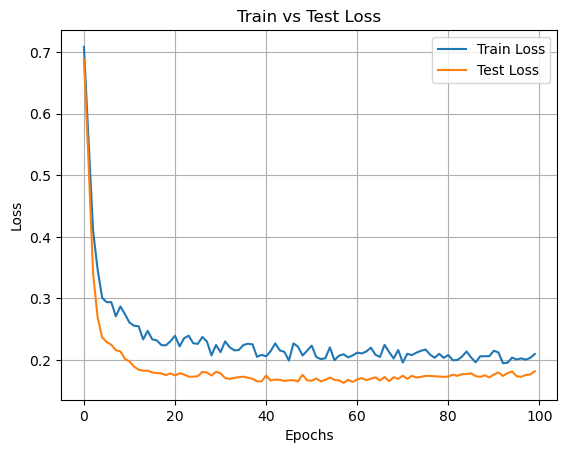

In [76]:
with torch.inference_mode():
    plt.plot(train_loss_values, label="Train Loss")
    plt.plot(test_loss_values, label="Test Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()
    plt.grid(True)
    plt.show()